In [68]:
import sympy as sp
import numpy as np
from sympy import init_printing
init_printing()

In [69]:
A = sp.zeros(3,2)
B = np.zeros((3,2))
m11, m22, m23, m32,  m33  = 25.8, 33.8, 6.2, 6.2, 2.76
Xu, Xuu, Yv, Yvv, Yr, Nv, Nr, Nrr = -12, -2.1,-17, -4.5, -0.2, -0.5, -0.5,-0.1
A = sp.eye(6)
Btau = sp.Matrix([[1,0],[0,0],[0,1]])
M = sp.Matrix([[m11, 0, 0],[0, m22, m23],[0, m32, m33]])
M_inv = M.inv() # inverse of M
Btau = sp.Matrix([[1,0],[0,0],[0,1]])
B2 = M_inv * Btau
BF = np.concatenate((B,B2))
BF2 = sp.Matrix(BF)

# INTERMEZZO FOR JACOBIAN CALCULATION
x, y, psi, u, v, r = sp.symbols('x y psi u v r')
x_jac = sp.Matrix([x,y,psi,u,v,r])

def D():
    return sp.Matrix([[Xu+Xuu*u, 0, 0], 
        [0, Yv+Yvv*v, Yr],
        [0, Nv, Nr+Nrr*-r]])


def C():
    c13 = -m22* v - ((m23+m32)/2) * r
    c23 = m11*u
    return sp.Matrix([[0,0,c13],
        [0,0, c23],
        [-c13,-c23,0]])

def R():
    return sp.Matrix([[sp.cos((psi)), -sp.sin((psi)), 0],
                [sp.sin((psi)), sp.cos((psi)), 0],
                [0,0,1]])

def F():
    eta = sp.Matrix([[(u)], 
                [(v)], 
                [(r)]])
    F1 = R() * eta
    F2 = -M_inv * ((C() - D()) * eta)
    return sp.Matrix(np.concatenate((F1,F2)))

In [70]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sp.Number)})

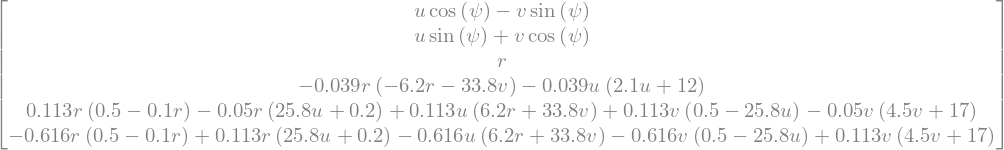

In [71]:
round_expr(F(),3)

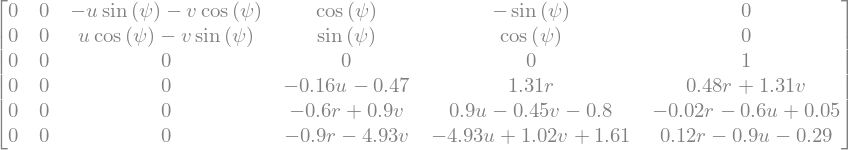

In [72]:
round_expr(F().jacobian(x_jac),2)

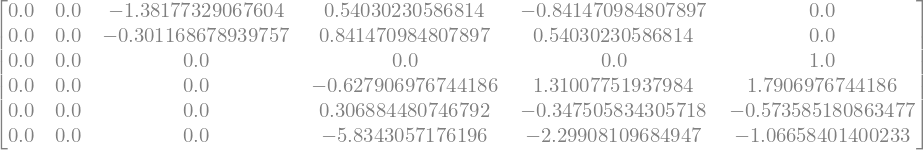

In [73]:
Jf = sp.lambdify(x_jac, F().jacobian(x_jac), 'numpy')
sp.Matrix(Jf(1,1,1,1,1,1))

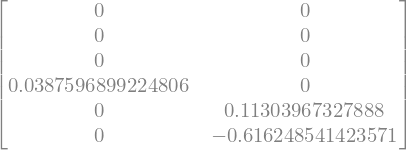

In [74]:
u = sp.Matrix([[1],[-1]])
BF2*sp.diag(*u)

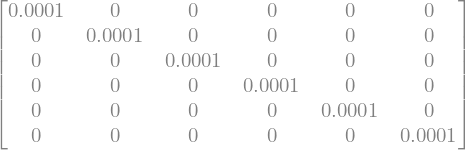

In [75]:
0.0001*sp.eye(6)

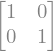

In [76]:
sp.eye(2)

In [77]:
sp.zeros(1,2)

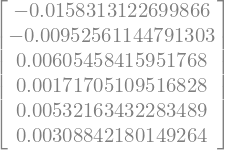

In [79]:
# Generate Vk matrix
Rf = 0.0001 * sp.eye(6)   # Define Rf

# Generate Vk matrix
mean = np.zeros(6)
covariance = Rf
Vk = np.random.multivariate_normal(mean, np.array(covariance), )

# Convert Vk to a SymPy matrix
sp.Matrix(Vk)